In [1]:
import cv2
import os
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
main_data_folder = 'data/stanford_cars_type'

images = []
labels = []
name = []

for label in os.listdir(main_data_folder):
    label_folder = os.path.join(main_data_folder, label)
    
    for image_file in os.listdir(label_folder):
        image_path = os.path.join(label_folder, image_file)
        
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Opcjonalne: Zmiana kanałów kolorów

        images.append(image)
        labels.append(label)
        name.append(image_file)
    


label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)


In [7]:
print(f'{labels_encoded.size}   {len(images)}')
np_images = np.array(images)
print(f'{labels_encoded.T.shape}   {np_images.T.shape}')

concatenated_array = np.vstack((labels_encoded, np_images)).T
print(f'{concatenated_array.shape}')


8144   8144


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (8144,) + inhomogeneous part.

In [3]:
main_data_folder = 'data/stanford_cars_type'

# Ścieżka do folderu, w którym zostaną zapisane przetworzone zdjęcia
output_folder = 'data/processed'

# Nowy wymiar obrazu
new_size = (255, 255)

# Przetwarzanie i zapis przetworzonych zdjęć
for label in os.listdir(main_data_folder):
    label_folder = os.path.join(main_data_folder, label)
    
    for image_file in os.listdir(label_folder):
        image_path = os.path.join(label_folder, image_file)

        # Wyodrębnij tylko cyfry z początku nazwy
        numeric_prefix = re.match(r'^\d+', image_file).group()

        # Wczytaj obraz za pomocą OpenCV
        image = cv2.imread(image_path)

        # Przeskaluj obraz do nowego wymiaru (255x255) i zamień na skalę szarości
        image = cv2.resize(image, new_size)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Nazwa nowego pliku
        new_filename = f'{numeric_prefix}.jpg'
        new_image_path = os.path.join(output_folder, new_filename)

        # Zapisz przetworzony obraz
        cv2.imwrite(new_image_path, image)

In [4]:
csv_file = 'data/stanford_cars_type.csv'
img_folder = 'data/processed'
data_csv = pd.read_csv(csv_file)
images_tab = []
labels_string = []

for index, row in data_csv.iterrows():
    filename = row['file_name']
    category = row['car_type']

    image_path = os.path.join(img_folder, filename)

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # image = image / 255.0
    images_tab.append(image)
    labels_string.append(category)

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels_string)
images = np.array(images_tab)

In [44]:
print(f'{labels.shape}   {images.shape}')
print(labels_string)

(8144,)   (8144, 255, 255)
['Coupe', 'Sedan', 'Cab', 'Sedan', 'Cab', 'Convertible', 'SUV', 'Sedan', 'Sedan', 'SUV', 'Sedan', 'SUV', 'Sedan', 'Minivan', 'Hatchback', 'Coupe', 'Coupe', 'Sedan', 'Hatchback', 'Other', 'Other', 'Convertible', 'SUV', 'Hatchback', 'Sedan', 'Sedan', 'Sedan', 'Cab', 'Coupe', 'Sedan', 'SUV', 'Hatchback', 'Other', 'SUV', 'SUV', 'Coupe', 'Convertible', 'Other', 'Sedan', 'SUV', 'Coupe', 'Hatchback', 'Van', 'Convertible', 'SUV', 'Coupe', 'Sedan', 'Sedan', 'Sedan', 'Coupe', 'Cab', 'SUV', 'Coupe', 'Other', 'Coupe', 'Cab', 'Sedan', 'Cab', 'Cab', 'Cab', 'Cab', 'Hatchback', 'Coupe', 'Sedan', 'Convertible', 'Sedan', 'Other', 'Cab', 'Sedan', 'Sedan', 'Minivan', 'SUV', 'Cab', 'Cab', 'Sedan', 'Convertible', 'SUV', 'Coupe', 'SUV', 'Other', 'Convertible', 'Hatchback', 'Wagon', 'Wagon', 'Sedan', 'SUV', 'Sedan', 'Hatchback', 'Sedan', 'Cab', 'Sedan', 'Sedan', 'Convertible', 'Coupe', 'Cab', 'Coupe', 'Other', 'Sedan', 'SUV', 'Van', 'Hatchback', 'Sedan', 'Sedan', 'Cab', 'SUV', 'Seda

### Eksploracyjna analiza danych
Przed wygenerowaniem wykresu należy uruchomić poprzednią komórkę, która zawiera przetworzone obrazy
- Wykres przedstawiający rozkład klas etykiet
- Możliwość wyświetlenia dowolnego obrazu ze zbioru danych wraz z histogramem

Counter({'Sedan': 1907, 'SUV': 1437, 'Coupe': 1088, 'Convertible': 1036, 'Cab': 719, 'Other': 609, 'Hatchback': 554, 'Wagon': 291, 'Van': 253, 'Minivan': 250})


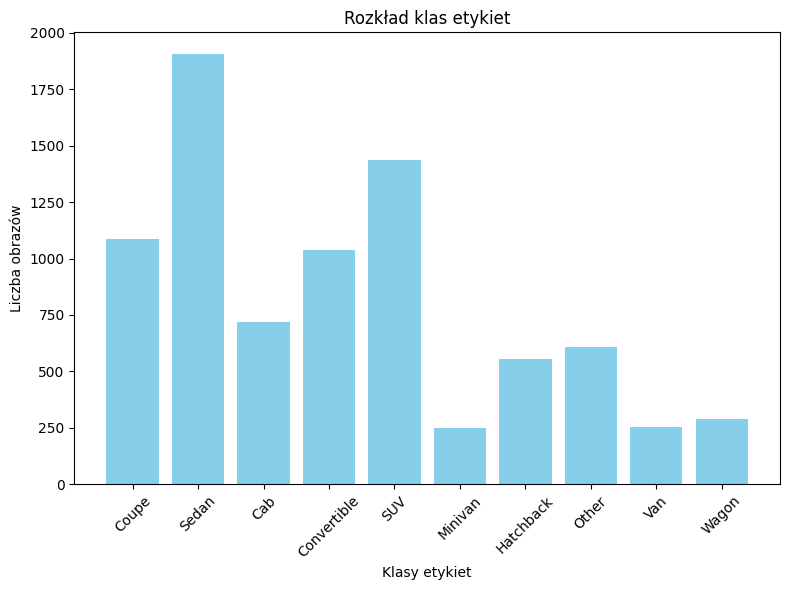

In [5]:
# Zliczenie etykiet
label_counts = Counter(labels_string)

print(label_counts)

# Rozpakowanie nazw etykiet i ich liczności do wykresu słupkowego
labels, counts = zip(*label_counts.items())

# Generowanie wykresu słupkowego
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Klasy etykiet')
plt.ylabel('Liczba obrazów')
plt.title('Rozkład klas etykiet')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

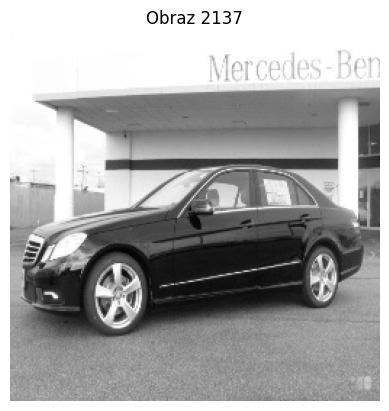

In [52]:
# Indeks obrazu do wyświetlenia
index_to_display = 2137  # Możesz zmienić indeks, aby wyświetlić inny obraz

# Wyświetlenie wybranego obrazu
plt.imshow(images[index_to_display], cmap='gray')  # 'gray' oznacza, że obraz będzie wyświetlony w skali szarości
plt.axis('off')  # Wyłączenie osi
plt.title(f"Obraz {index_to_display}")
plt.show()

images len =  8144


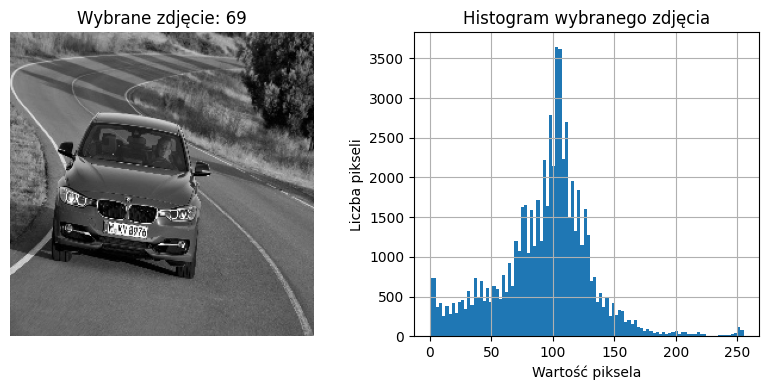

In [6]:
def generate_image_histogram_by_index(images_data, labels, index, bins=256):
    # Sprawdzenie poprawności indeksu
    if index < 0 or index >= len(images_data):
        print("Nieprawidłowy indeks")
        return

    print("images len = ", len(images_data))

    # Wybranie obrazu na podstawie indeksu
    image = images_data[index].reshape(255,255)
  
    # Wyświetlenie obrazu i jego histogramu
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Wybrane zdjęcie: {index}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.hist(image.ravel(),100,[0,255])
    plt.title('Histogram wybranego zdjęcia')
    plt.xlabel('Wartość piksela')
    plt.ylabel('Liczba pikseli')
    plt.grid()

    plt.tight_layout()
    plt.show()


chosen_index = 69  # Indeks wybranego zdjęcia
generate_image_histogram_by_index(images, labels, chosen_index)